In [4]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/colab/movie/netflix')

Mounted at /content/gdrive


# Import


In [5]:
import pandas as pd
data = pd.read_csv('netflix_titles.csv')

In [6]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [7]:
#Check Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Handling missing data

In [8]:
data.isnull().sum() #Check null column

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Remove nan data in column cast and directot 
condition = pd.notna(data.director)
condition2 = pd.notna(data.cast)
data = data[condition & condition2]

In [10]:
data.isnull().sum(0)

show_id           0
type              0
title             0
director          0
cast              0
country         131
date_added        0
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3909 non-null   int64 
 1   type          3909 non-null   object
 2   title         3909 non-null   object
 3   director      3909 non-null   object
 4   cast          3909 non-null   object
 5   country       3778 non-null   object
 6   date_added    3909 non-null   object
 7   release_year  3909 non-null   int64 
 8   rating        3905 non-null   object
 9   duration      3909 non-null   object
 10  listed_in     3909 non-null   object
 11  description   3909 non-null   object
dtypes: int64(2), object(10)
memory usage: 397.0+ KB


# Create Column Feature

In [12]:
data['feature'] = data.director + '' +data.cast + '' + data.description + '' + data.listed_in

In [13]:
data['feature']

0       Richard Finn, Tim MaltbyAlan Marriott, Andrew ...
4       Fernando LebrijaNesta Cooper, Kate Walsh, John...
6       Gabe IbáñezAntonio Banderas, Dylan McDermott, ...
7       Rodrigo Toro, Francisco SchultzFabrizio Copano...
9       Henrik Ruben GenzJames Franco, Kate Hudson, To...
                              ...                        
6142    Andy DevonshireMel Giedroyc, Sue Perkins, Mary...
6158    Thomas AstrucCristina Vee, Bryce Papenbrook, K...
6167    Vikramaditya Motwane, Anurag KashyapSaif Ali K...
6182    Jung-ah ImHo-dong Kang, Soo-geun Lee, Sang-min...
6213    Onur ÜnlüAli Atay, Melis Birkan, Serkan Keskin...
Name: feature, Length: 3909, dtype: object

In [14]:
data = data.reset_index() #reset index 
data.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,feature
0,0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"Richard Finn, Tim MaltbyAlan Marriott, Andrew ..."
1,4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"Fernando LebrijaNesta Cooper, Kate Walsh, John..."
2,6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...","Gabe IbáñezAntonio Banderas, Dylan McDermott, ..."
3,7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,"Rodrigo Toro, Francisco SchultzFabrizio Copano..."
4,9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,"Henrik Ruben GenzJames Franco, Kate Hudson, To..."


**Cleaning data**

In [15]:
import re
import string

def clean_data(txt):
  txt = re.sub(r'<.*?>','',txt)
  txt = re.sub(r'[0-9]','',txt)
  txt = re.sub(r',','',txt)
  txt = txt.lower()
  for c in string.punctuation:
    txt = re.sub(r'\{}'.format(c),'',txt)
  txt = ' '.join(txt.split())

  return txt

In [16]:
clean_text = [clean_data(txt) for txt in data['feature']]

***Token***

In [17]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32916 sha256=e22adc21fa2ac1b9e843b07f6a47fd336c1aff2e1e3bb2f4fc5d3f83674e38e5
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
def split_word(text):
   tokens = word_tokenize(text)
   tokens = [i for i in tokens if not i in en_stop]
   tokens = [lemmatizer.lemmatize(w) for w in tokens]
   tokens = [p_stemmer.stem(i) for i in tokens]

   return tokens


In [20]:
tokens_list = [split_word(txt) for txt in clean_text]

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [21]:
clean_text[:5]

['richard finn tim maltbyalan marriott andrew toth brian dobson cole howard jennifer cameron jonathan holmes lee tockar lisa durupt maya kay michael dobsonbefore planning an awesome wedding for his grandfather a polar bear king must take back a stolen artifact from an evil archaeologist firstchildren family movies comedies',
 'fernando lebrijanesta cooper kate walsh john michael higgins keith powers alicia sanz jake borelli kid ink yousef erakat rebekah graf anne winters peter gilroy patrick daviswhen nerdy high schooler dani finally attracts the interest of her longtime crush she lands in the cross hairs of his ex a social media celebritycomedies',
 'gabe ibáñezantonio banderas dylan mcdermott melanie griffith birgitte hjort sørensen robert forster christa campbell tim mcinnerny andy nyman david ryallin a dystopian future an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a global conspiracyinternational movies scifi fantasy thril

# Extract Feature

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
feature_text = vectorizer.fit_transform(clean_text)

In [27]:
vectorizer.get_feature_names()[40:50]

['abagnale',
 'abaitua',
 'abana',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abargil',
 'abargilweeks',
 'abayomi']

In [28]:
doc_term_matrix = feature_text.todense()
df_feature = pd.DataFrame(doc_term_matrix, 
                  columns=vectorizer.get_feature_names(), 
                  index=[data['title']])

In [29]:
df_feature.shape

(3909, 39974)

# Correlation Table

In [30]:
from sklearn.metrics.pairwise import cosine_similarity  
cosine_sim=cosine_similarity(df_feature,df_feature)

In [31]:
#Select 8 Title for visualization
cosim = cosine_sim[:8,:8].round(3) 

In [32]:
cosim

array([[1.   , 0.025, 0.053, 0.036, 0.027, 0.   , 0.028, 0.066],
       [0.025, 1.   , 0.   , 0.   , 0.052, 0.   , 0.   , 0.   ],
       [0.053, 0.   , 1.   , 0.   , 0.027, 0.   , 0.056, 0.033],
       [0.036, 0.   , 0.   , 1.   , 0.   , 0.103, 0.   , 0.046],
       [0.027, 0.052, 0.027, 0.   , 1.   , 0.   , 0.086, 0.   ],
       [0.   , 0.   , 0.   , 0.103, 0.   , 1.   , 0.   , 0.047],
       [0.028, 0.   , 0.056, 0.   , 0.086, 0.   , 1.   , 0.035],
       [0.066, 0.   , 0.033, 0.046, 0.   , 0.047, 0.035, 1.   ]])

In [33]:
label = data['title'][:8]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


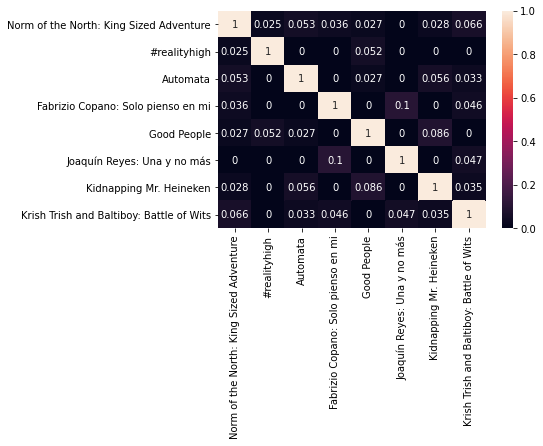

In [34]:
import seaborn as sns
heatmap = sns.heatmap(cosim, annot=True,
                 xticklabels = label ,yticklabels = label )

# Prediction

In [40]:
movies = data.reset_index()
movies.head()

,level_0,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,feature
0,0,0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"Richard Finn, Tim MaltbyAlan Marriott, Andrew ..."
1,1,4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"Fernando LebrijaNesta Cooper, Kate Walsh, John..."
2,2,6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...","Gabe IbáñezAntonio Banderas, Dylan McDermott, ..."
3,3,7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,"Rodrigo Toro, Francisco SchultzFabrizio Copano..."
4,4,9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,"Henrik Ruben GenzJames Franco, Kate Hudson, To..."


In [41]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [42]:
indices

title
Norm of the North: King Sized Adventure       0
#realityhigh                                  1
Automata                                      2
Fabrizio Copano: Solo pienso en mi            3
Good People                                   4
                                           ... 
The Great British Baking Show              3904
Miraculous: Tales of Ladybug & Cat Noir    3905
Sacred Games                               3906
Men on a Mission                           3907
Leyla and Mecnun                           3908
Length: 3909, dtype: int64

In [43]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 8 most similar movies
    sim_scores = sim_scores[1:9]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 8 most similar movies
    return data['title'].iloc[movie_indices]

In [44]:
get_recommendations('Automata', cosine_sim)

2629      The Ritual
2036       The Rover
2244    Kraftidioten
3060      Sweetheart
1328       Apollo 18
1001    Edge of Fear
2285            IBOY
19          Next Gen
Name: title, dtype: object